# Example: PyRayHF Generate Oblique Data
This is a modification of [`Example_PyRayHF_Cartesian_Gradient.ipynb`](./Example_PyRayHF_Cartesian_Gradient.ipynb) that simply demonstrates the process of ray tracing on input data obtained from PyIRI and generation of the oblique ionogram.

(see [`Example_Generate_2D_Input.ipynb`](./Example_Generate_2D_Input.ipynb) for generating PyIRI input data for PyRayHF)

1. Imports

In [1]:
#!/usr/bin/env python
import numpy as np
import pickle
import matplotlib.pyplot as plt
import PyRayHF
from copy import deepcopy
import matplotlib.colors as colors
import matplotlib.cm as cm
import pickle

Load Previously Generated EDP

In [14]:
# Load an ionospheric profile
# See Example_Generate_Input_Arrays for how to create input
# arrays using PyIRI.
file_open = 'MoJo_Oblique_0N_0E.p'
mojo_oblique = pickle.load(open(file_open, 'rb'))

file_open = 'MoJo_Oblique_Night.p'
mojo_oblique_uniform = pickle.load(open(file_open, 'rb'))

file_open = 'MoJo_Vertical_Night.p'
mojo_vertical = pickle.load(open(file_open, 'rb'))

file_open = 'Example_Input_Night.p'
input_arrays = pickle.load(open(file_open, 'rb'))

file_open = 'Example_Input_2D_Night.p'
input_arrays_2d = pickle.load(open(file_open, 'rb'))

R_loc = 1000.


# uniform case
nrays = len(mojo_oblique_uniform['ray_data_X'])
af0_uniform_Hz = np.zeros(nrays) # Array of ray frequencies
P_uniform = np.zeros(nrays)
for i in range(nrays):
    af0_uniform_Hz[i] = mojo_oblique_uniform["ray_data_X"][i]["freq_Hz"]
    P_uniform[i] = mojo_oblique_uniform["ray_data_X"][i]["delay_km"]

# gradient case
nrays = len(mojo_oblique['ray_data_X'])
af0_Hz = np.zeros(nrays) # Array of ray frequencies
P = np.zeros(nrays)
for i in range(nrays):
    af0_Hz[i] = mojo_oblique["ray_data_X"][i]["freq_Hz"]
    P[i] = mojo_oblique["ray_data_X"][i]["delay_km"]

a_x_apex = np.zeros((nrays))
a_z_apex = np.zeros((nrays))
for i in range(nrays):
    a_x_apex[i] = mojo_oblique['ray_data_X'][i]['x_apex_km']
    a_z_apex[i] = mojo_oblique['ray_data_X'][i]['z_apex_km']

alt_km = input_arrays["alt"]
Ne = input_arrays["den"]
Babs = input_arrays["bmag"]
bpsi = input_arrays["bpsi"]

# Ensure ground level is included
h_ground = 0
if alt_km[0] > h_ground:
    Ne0 = np.interp(h_ground, alt_km, Ne)
    Babs0 = np.interp(h_ground, alt_km, Babs)
    bpsi0 = np.interp(h_ground, alt_km, bpsi)
    alt_km = np.insert(alt_km, 0, h_ground)
    Ne = np.insert(Ne, 0, Ne0)
    Babs = np.insert(Babs, 0, Babs0)
    bpsi = np.insert(bpsi, 0, bpsi0)

for ifr in range(af0_Hz.size):
    print(mojo_oblique['ray_data_X'][ifr]['x_apex_km'])


501.30698182002516
501.4856056375166
499.0741174360516
502.27395792921993
500.7845534552152
500.89623049391844
499.6709895761983
500.3140394087386
501.2350236671081
502.82561670487155
501.5351947575328
499.93444163846993
502.72533201380634
502.43314681994593
500.75932030654616
501.49057144226276
500.0312421961943
499.9055815340704
500.3209146350062
500.124896081309
500.30251970451565
504.1604875209009
501.2051273241467
501.9222831768576
503.3567339287652
497.7096737625909
497.10773325607295
497.2989060993353
496.18030693642925
493.96475712168956
493.69189505206384
492.01354746669585
490.5285529247071
491.44697225688157
490.4231568620402
487.10691790484714
484.07875208707264
485.4101470732065
485.69671413338443
481.79517364877995
483.7746792267491
479.73162907234956
481.4423345916431
481.048112636963
479.1360832800412
475.7777321594728
477.8452606253192
477.2453124209994
476.9759802548119
476.8782483316724
472.77153181239237
474.8409946083644
472.3330641049002
472.5692266431039
471.9345

Plot oblique and vertical at midpoint

/var/folders/hx/vfmrc7fn3cb_5y7fpsjwylcw0000gq/T/ipykernel_8496/4045523014.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.94, 1])  # leave space for colorbar


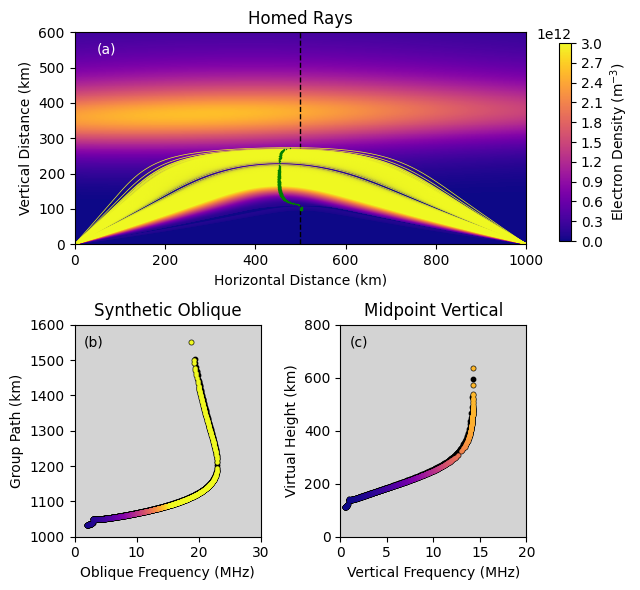

In [21]:
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])
ax_top = fig.add_subplot(gs[0, :])
ax_bot1 = fig.add_subplot(gs[1, 0])
ax_bot2 = fig.add_subplot(gs[1, 1])

# --- Top: Raytracing plot ------------------------------------------------
ax_plot = ax_top
ax_plot.set_xlim(0, 1000)
ax_plot.set_ylim(0, 600)
ax_plot.set_facecolor("lightgray")
ax_plot.set_ylabel('Vertical Distance (km)')
ax_plot.set_xlabel('Horizontal Distance (km)')
ax_plot.set_title("Homed Rays")

vmin, vmax = 0, 3e12
nx = 500
xmax = 1000.
x_grid = np.linspace(0, xmax, nx)
z_grid = alt_km
Xg, Zg = np.meshgrid(x_grid, z_grid)
Ne_grid = np.tile(Ne[:, np.newaxis], (1, nx))


Xg, Zg = np.meshgrid(input_arrays_2d["xgrid"], input_arrays_2d["zgrid"])
Ne_grid = input_arrays_2d["den"]

# Plot Density
pc = ax_plot.pcolormesh(Xg, Zg, Ne_grid, shading='auto',
                        cmap='plasma', vmin=vmin, vmax=vmax)
ax_plot.axvline(x=R_loc / 2., linestyle='--', color='black', linewidth=1)

cmap = cm.plasma
norm = colors.Normalize(vmin=vmin, vmax=vmax)
af0_den = PyRayHF.library.freq2den(af0_Hz)

for ifr in range(af0_Hz.size):
    color = cmap(norm(af0_den[ifr]))
    ax_plot.plot(mojo_oblique['ray_data_X'][ifr]['x'][:], mojo_oblique['ray_data_X'][ifr]['z'][:], color=color, linewidth=0.5)

for ifr in range(af0_Hz.size):
    ax_plot.scatter(mojo_oblique['ray_data_X'][ifr]['x_apex_km'], mojo_oblique['ray_data_X'][ifr]['z_apex_km'], color='green', s=1, zorder=2, linewidths=0)

ax_plot.text(0.05, 0.95, '(a)', transform=ax_plot.transAxes,
             ha='left', va='top', c='white')

# --- Bottom left: Synthetic Oblique -------------------------------------
ax = ax_bot1
ax.set_title('Synthetic Oblique')
ax.set_facecolor('lightgray')
ax.set_ylabel('Group Path (km)')
ax.set_xlabel('Oblique Frequency (MHz)')
ax.set_xlim([0, 30])
ax.set_ylim([1000, 1600])

# Plot uniform case
f_uniform = af0_uniform_Hz / 1e6
ax.scatter(f_uniform, P_uniform, c='black', s=10)

# Plot gradient case
f = af0_Hz / 1e6
ax.scatter(f, P, c='black', s=10)

for ifr in range(af0_Hz.size):
    color = cmap(norm(af0_den[ifr]))
    ax.scatter(f[ifr], P[ifr], color=color, s=5)
ax.text(0.05, 0.95, '(b)', transform=ax.transAxes,
        ha='left', va='top', c='black')

# --- Bottom right: Midpoint Vertical ------------------------------------
ax = ax_bot2
ax.set_title('Midpoint Vertical')
ax.set_facecolor('lightgray')
ax.set_ylabel('Virtual Height (km)')
ax.set_xlabel('Vertical Frequency (MHz)')
ax.set_xlim([0, 20])
ax.set_ylim([0, 800])

# Find R_E at the T location
R_E = PyRayHF.library.earth_radius_at_latitude(input_arrays['tlat'])
# Oblique to vertical conversion
freq_vertical_mhz, height_virtual_km = PyRayHF.library.oblique_to_vertical(
    R_loc, P, f, R_E=R_E)

freq_vertical_mhz_den = PyRayHF.library.freq2den(freq_vertical_mhz * 1e6)
ax.scatter(mojo_vertical['afreq_Hz'] / 1e6, mojo_vertical['vh_X_km'], c='black', s=10)

ax.scatter(freq_vertical_mhz, height_virtual_km, c='black', s=10)
for ifr in range(af0_Hz.size):
    color = cmap(norm(freq_vertical_mhz_den[ifr]))
    ax.scatter(freq_vertical_mhz[ifr], height_virtual_km[ifr], color=color, s=5)
ax.text(0.05, 0.95, '(c)', transform=ax.transAxes,
        ha='left', va='top', c='black')

# --- Single shared vertical colorbar on the right ------------------------
cbar_ax = fig.add_axes([0.94, 0.59, 0.02, 0.33])  # x, y, width, height
cbar = fig.colorbar(pc, cax=cbar_ax, orientation='vertical')
cbar.set_label('Electron Density (m$^{-3}$)')
cbar.set_ticks(np.arange(vmin, vmax + 3e11, 3e11))

plt.tight_layout(rect=[0, 0, 0.94, 1])  # leave space for colorbar
plt.savefig('../figures/Oblique.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


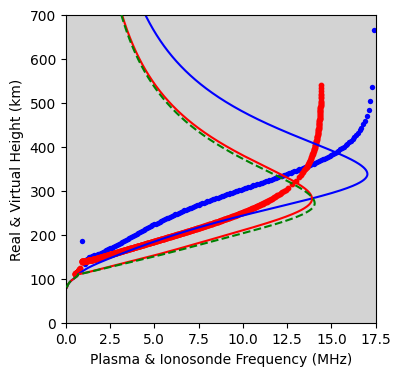

In [ ]:
# Compute virtual height for the ordinary 'O' propagation mode.
# A low number of vertical grid points is sufficient for O-mode (e.g., 200).
# Consider this the model background for the upcoming minimization.
mode = 'X'
n_points = 200

vh_data, EDP_truth = PyRayHF.library.model_VH(input_arrays['F2'],
                                              input_arrays['F1'],
                                              input_arrays['E'],
                                              input_arrays['freq'],
                                              input_arrays['alt'],
                                              input_arrays['bmag'],
                                              input_arrays['bpsi'],
                                              mode=mode,
                                              n_points=n_points)

# Create a background by modifying the truth parameters:
F2_back = deepcopy(input_arrays['F2'])
F2_back['Nm'] = F2_back['Nm'] * 1.5
F2_back['hm'] = F2_back['hm'] * 1.2
F2_back['B0'] = F2_back['B0'] * 0.8

# Produce background data, or the observations expected by the background
vh_back, EDP_back = PyRayHF.library.model_VH(F2_back,
                                             input_arrays['F1'],
                                             input_arrays['E'],
                                             input_arrays['freq'],
                                             input_arrays['alt'],
                                             input_arrays['bmag'],
                                             input_arrays['bpsi'],
                                             mode=mode,
                                             n_points=n_points)

# Filter out NaNs in the synthetic data before minimization.
# Minimization will not work properly if NaNs are present.
ind_valid = np.where(np.isfinite(height_virtual_km) == 1)[0]
freq_in = freq_vertical_mhz[ind_valid]  #input_example['freq'][ind_valid]
vh_in = height_virtual_km[ind_valid]

# Using Powell optimization to find F2-layer parameters that best
# reproduce the synthetic virtual height observations.
(vh_result,
 EDP_result) = PyRayHF.library.minimize_parameters(F2_back,
                                                   input_arrays['F1'],
                                                   input_arrays['E'],
                                                   freq_in,
                                                   vh_in,
                                                   input_arrays['alt'],
                                                   input_arrays['bmag'],
                                                   input_arrays['bpsi'],
                                                   method='Powell',
                                                   percent_sigma=20.,
                                                   step=2.,
                                                   mode=mode,
                                                   n_points=n_points)

# Plot the results of the minimization
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
ax.set_ylim([0, 700])
ax.set_xlim([0, 17.5])
ax.set_facecolor('lightgray')
ax.set_ylabel('Real & Virtual Height (km)')
ax.set_xlabel('Plasma & Ionosonde Frequency (MHz)')

ax.plot(PyRayHF.library.den2freq(EDP_back) / 1e6, input_arrays['alt'], c='blue', label='Background', zorder=2)
ax.scatter(input_arrays['freq'], vh_back, c='blue', label='Model Data', zorder=1, linewidth=0, s=15)

ax.plot(PyRayHF.library.den2freq(EDP_truth) / 1e6, input_arrays['alt'], c='red', label='Truth', zorder=2)
ax.scatter(freq_vertical_mhz, height_virtual_km, c='red', s=10, label='MoJo Transformed')

ax.plot(PyRayHF.library.den2freq(EDP_result) / 1e6, input_arrays['alt'], '--', c='green', label='Result', zorder=3)

plt.savefig('../figures/Minimization.png', dpi=300, bbox_inches='tight', facecolor='white')
 